# Mod 4 Project - Time Series Modeling - Zillow US Housing Prices

* Student name: John Cho
* Student pace: full time online
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL: https://medium.com/@johnnyboyee/the-new-generation-c-71035d37f67c


## Dataset Exploration and Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

# Import our cleaned dataset using pickle
with open('df.pickle', 'rb') as f:
    df = pickle.load(f)
df.head(3)

,Zipcode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,"60657 Chicago, IL",334200,335400,336500,337600,338500,339500,340400,341300,342600,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,"75070 McKinney, TX",235700,236900,236700,235400,233300,230600,227300,223400,219600,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,"77494 Katy, TX",210400,212200,212200,210700,208300,205500,202500,199800,198300,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900


### Data Preprocessing, Transformation
> For time series modeling, we need to set the dataframe index to the date columns.

In [2]:
# Creating new transposed dataframe with Date column
dft = pd.DataFrame()
dft['Date'] = pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Loop to create new column for each zipcode row, populating in property values from each date column. Each zipcode will convert
# from a row to a column, matching up with the dates in the newly created Month column
for zip in df.Zipcode: 
    dft[zip] = df[df.Zipcode==zip].iloc[:,1:].values[0]
    dft[zip] = dft[zip].astype('int')

# Set Date column as index as required for time series modeling
dft.set_index('Date',inplace=True)
dft

,"60657 Chicago, IL","75070 McKinney, TX","77494 Katy, TX","60614 Chicago, IL","79936 El Paso, TX","77084 Houston, TX","10467 New York, NY","60640 Chicago, IL","77449 Katy, TX","94109 San Francisco, CA",...,"3765 Haverhill, NH","84781 Pine Valley, UT","12429 Esopus, NY","97028 Rhododendron, OR","12720 Bethel, NY","1338 Ashfield, MA","3293 Woodstock, NH","40404 Berea, KY","81225 Mount Crested Butte, CO","89155 Mesquite, NV"
Date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,334200,235700,210400,498100,77300,95000,152900,216500,95400,766000,...,80800,135900,78300,136200,62500,94600,92700,57100,191100,176400
1996-05-01,335400,236900,212200,500900,77300,95200,152700,216700,95600,771100,...,80100,136300,78300,136600,62600,94300,92500,57300,192400,176300
1996-06-01,336500,236700,212200,503100,77300,95400,152600,216900,95800,776500,...,79400,136600,78200,136800,62700,94000,92400,57500,193700,176100
1996-07-01,337600,235400,210700,504600,77300,95700,152400,217000,96100,781900,...,78600,136900,78200,136800,62700,93700,92200,57700,195000,176000
1996-08-01,338500,233300,208300,505500,77400,95900,152300,217100,96400,787300,...,77900,137100,78100,136700,62700,93400,92100,58000,196300,175900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,1018700,316600,321200,1299000,120300,162800,414300,777900,172300,3778700,...,123400,257600,171300,341000,122800,216400,213100,130600,694700,348900
2018-01-01,1024400,318100,321200,1302700,120300,162800,413900,778500,173300,3770800,...,124400,258000,172400,342300,123200,213100,213700,131700,706400,350400
2018-02-01,1030700,319600,323000,1306400,120500,162900,411400,780500,174200,3763100,...,125500,260600,173600,345000,123200,209800,218300,132500,705300,353000


#### Note that our dataset has monthly value intervals; let's go ahead and resample it into annual intervals (values determined by the mean of all the months for that year)

In [3]:
dft_annual = dft.resample('AS').mean().astype('int64')
dft_annual

,"60657 Chicago, IL","75070 McKinney, TX","77494 Katy, TX","60614 Chicago, IL","79936 El Paso, TX","77084 Houston, TX","10467 New York, NY","60640 Chicago, IL","77449 Katy, TX","94109 San Francisco, CA",...,"3765 Haverhill, NH","84781 Pine Valley, UT","12429 Esopus, NY","97028 Rhododendron, OR","12720 Bethel, NY","1338 Ashfield, MA","3293 Woodstock, NH","40404 Berea, KY","81225 Mount Crested Butte, CO","89155 Mesquite, NV"
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-01,338444,230988,206655,503444,77455,95733,152211,217266,96255,788344,...,77877,137122,78133,136433,62555,93533,91966,58000,196511,176055
1997-01-01,352700,198875,200100,499083,77933,95616,152308,227275,97008,883125,...,71641,140983,78350,132125,62183,94183,89258,62416,218016,177183
1998-01-01,396766,205291,240391,561625,79216,97608,156716,260908,101333,1070766,...,69458,145008,79566,119941,62466,102083,87283,70958,263175,180150
1999-01-01,467108,197375,301125,651916,81075,104441,166766,313700,112208,1372341,...,69375,147516,81683,116175,64375,109908,88666,77475,313416,184808
2000-01-01,565883,222158,319941,751383,82450,105458,183783,379883,124491,1756550,...,69150,150358,88000,119975,67883,116533,93433,79375,352591,193741
2001-01-01,653983,216750,290216,853816,79608,107283,204675,440116,116650,2029275,...,74325,154366,100433,123291,75266,125083,101291,82833,383575,207125
2002-01-01,711758,194191,238033,932175,79266,112166,230691,489150,115983,2135666,...,83575,156008,119125,130166,87016,136925,113908,85016,406350,222783
2003-01-01,744375,188608,221733,994183,81983,116408,250266,525333,120125,2111233,...,94291,153108,151000,143941,97341,153308,132841,89125,416425,248766
2004-01-01,784066,193591,232491,1039658,88375,122700,286091,559783,127916,2368533,...,99383,153858,178733,190558,117516,177575,170666,96025,462841,348575


#### Let's see what kind of ranges and percentiles we're working with.

In [4]:
dft_annual.T.describe().round() #have to transpose year row into column for describe function to work

Date,1996-01-01,1997-01-01,1998-01-01,1999-01-01,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,...,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01
count,14723.0,14723.0,14723.0,14723.0,14723.0,14723.0,14723.0,14723.0,14723.0,14723.0,...,14723.0,14723.0,14723.0,14723.0,14723.0,14723.0,14723.0,14723.0,14723.0,14723.0
mean,121802.0,125059.0,131597.0,140494.0,152460.0,164815.0,177541.0,193212.0,214737.0,242629.0,...,219152.0,212292.0,202362.0,202119.0,214918.0,228416.0,241323.0,255656.0,272591.0,285394.0
std,155422.0,157525.0,161192.0,166867.0,178196.0,189905.0,200655.0,213955.0,219560.0,246267.0,...,232921.0,234765.0,230823.0,231791.0,255495.0,290585.0,324220.0,342616.0,359112.0,371425.0
min,11855.0,13133.0,14575.0,15583.0,16441.0,17425.0,18916.0,20641.0,20700.0,20700.0,...,20250.0,18633.0,15633.0,15466.0,15608.0,14041.0,13783.0,14658.0,14483.0,13900.0
25%,69744.0,72125.0,75883.0,80200.0,84087.0,88004.0,91346.0,95741.0,101166.0,109050.0,...,109924.0,106220.0,101370.0,100316.0,103458.0,107370.0,112892.0,118829.0,126575.0,131588.0
50%,100266.0,102266.0,107291.0,113475.0,120266.0,126950.0,133758.0,141991.0,152891.0,168233.0,...,160991.0,155433.0,147225.0,146125.0,152550.0,159608.0,166150.0,175316.0,187675.0,195800.0
75%,143972.0,146737.0,152554.0,161242.0,173500.0,187250.0,203100.0,224562.0,253350.0,293133.0,...,254783.0,244446.0,230758.0,229166.0,241862.0,255312.0,267354.0,284083.0,303996.0,317688.0
max,13922800.0,13922800.0,13922800.0,13922800.0,13922800.0,13922800.0,13922800.0,13922800.0,10346558.0,9420825.0,...,11289525.0,12826333.0,12828325.0,11139316.0,11619600.0,14307033.0,17270600.0,18749391.0,18794875.0,18282225.0


### Over this 12 year period, it is clear that housing valuations appreciate consistently year over year (aside from the once in a lifetime market shock) evidenced by the steady increases in mean, min, max, quartile values. Much of this has to do with inflation, population growth, increasing popularity as an investment, demand outstripping supply, skewed mortgage/rent ratios, etc. as well as a host of other factors.
> Note the more than doubling of standard deviation over this time period (155k to 371k) that one can point to as evidence of the ever increasing gap between the rich and the middle/lower class.

When starting to think about the posed question: ***What are the top 5 best zip codes for us to invest in?*** - we can immediately turn to **ROI** (Return On Investment) as the top metric for determining this. Various ways of selecting the baseline denominator (cost of entry point) and exit timeframes can produce a multitude of different ROIs to compare. However, many devils lie in the details of other related questions to help define 'best.'
* Is the investing strategy geared towards many smaller priced homes or a few higher priced ones?
* Will the strategy be 'all in' as in having no 'idle cash' or more balanced - seeking to only invest when the 'time is right?'
* What is the timeline for each 'home flip': pre-defined, flexible, reactionary?
* What kind of 'exit triggers' are we looking out for, if any? (how to implement the 'buy low, sell high' strategy)
* What is the investor's risk profile? (aggressive/conservative, long time horizon vs short)

The ***strategy*** we will employ to narrow down our list of almost fifteen thousand zip codes to the ***'Best Five'*** will be as follows:

* **Initially combine the top 5% (~750) of various ROI measures and filter out for the zip codes that only appear in every group (hopefully only a few hundred).**
* **Create additional filters for risk and resilience to keep narrowing down the list.**
* **Finalize selection of the top 5 zip codes for different investing risk profiles.**

When it comes to ROI, a good baseline assumption to start with is by factoring in the cost of inflation, which has consistently ranged between 2-3% in the US. https://inflationdata.com/Inflation/Inflation_Rate/HistoricalInflation.aspx
> This is the minimum 'break even' ROI required to match inflation.

In [5]:
print(1.025**12 - 1) #print 12 year ROI assuming annual 2.5% inflation rate

0.3448888242462971


#### So roughly 35% ROI is our inflation 'break even' point for our dataset's entire 12 year period.
Let's go ahead and start generating different ROI measures. We'll start with an overall min-max ROI (min=entry, max=exit) and beginning to end (1996=entry, 2018=exit).

In [6]:
# Create new dataframe for storing ROI metrics
dft_roi = pd.DataFrame(index = dft_annual.columns, columns=['Min_Max_ROI','1996_to_2018'])

# Calculate ROI from lowest annual value to highest
for zip in dft_annual.columns:
    dft_roi.loc[zip, 'Min_Max_ROI'] = (dft_annual[zip].max() - 
                                       dft_annual[zip].min()) / dft_annual[zip].min()
# Calculate ROI from 1996 to 2018
for zip in dft_annual.columns:
    dft_roi.loc[zip, '1996_to_2018'] = (dft_annual[zip]['2018'].values[0] - 
                                        dft_annual[zip]['1996'].values[0]) / dft_annual[zip]['1996'].values[0]

dft_roi.Min_Max_ROI = dft_roi.Min_Max_ROI.astype('float64')
dft_roi['1996_to_2018'] = dft_roi['1996_to_2018'].astype('float64')

dft_roi.describe()

,Min_Max_ROI,1996_to_2018
count,14723.000000,14723.000000
mean,1.387741,1.211672
std,0.853103,0.858711
min,0.062251,-0.641192
25%,0.806905,0.681247
50%,1.219434,1.060237
75%,1.736302,1.526706
max,10.785706,10.785706


C:\Users\Johnny\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


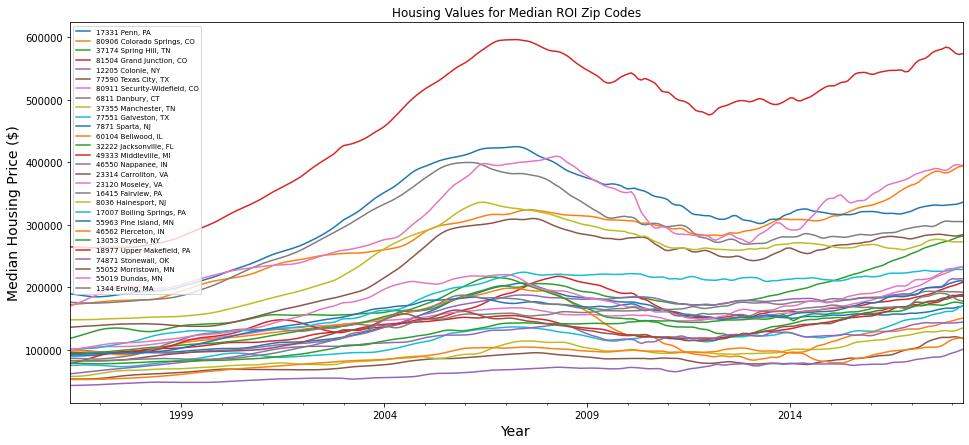

In [7]:
# Visualize zip codes at the median min-max ROI
zips = list(dft_roi[dft_roi.Min_Max_ROI>1.24][dft_roi.Min_Max_ROI<1.245].index)
dftemp = dft.loc[:,zips]

ax = dftemp.plot(figsize = (16,7), title='Housing Values for Median ROI Zip Codes')
ax.set_ylabel('Median Housing Price ($)', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
plt.legend(fontsize=7)
plt.show()

count    28.000000
mean      7.312586
std       1.390089
min       6.019688
25%       6.202810
50%       6.833690
75%       7.925811
max      10.785706
Name: Min_Max_ROI, dtype: float64

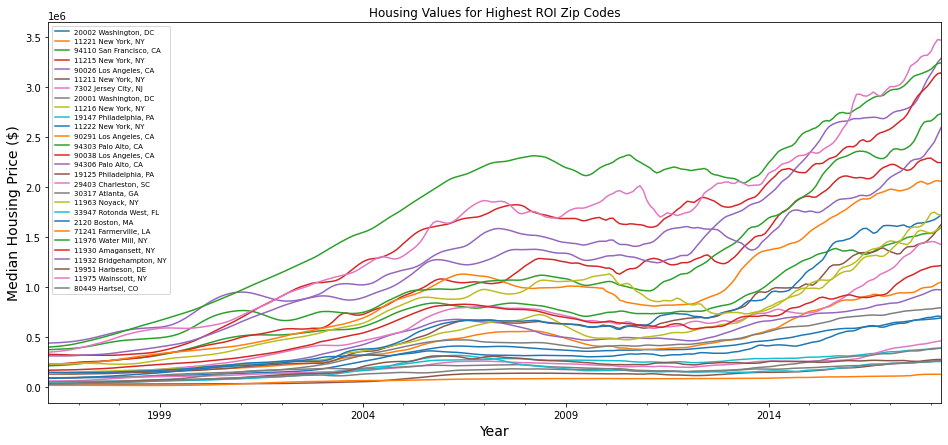

In [8]:
# Show 5 point statistics
display(dft_roi[dft_roi.Min_Max_ROI>6].Min_Max_ROI.T.describe())

# Visualize the top min-max ROI zip codes
zips = list(dft_roi[dft_roi.Min_Max_ROI>6].index)
dftemp = dft.loc[:,zips]

ax = dftemp.plot(figsize = (16,7), title='Housing Values for Highest ROI Zip Codes')
ax.set_ylabel('Median Housing Price ($)', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
plt.legend(fontsize=7)
plt.show();

### Of course what jumps out is the infamous 2008 housing crash. Between the 2 plots we can see one huge difference: the median zip codes barely retraced back to their pre-crash highs while the top blew right past them to continue to set new highs! Unsurprisingly, the top performing zip codes are all easily recognizable as major, high growth cities. It is clear that the 2008 housing crash was more of a 'bump in the road' for the top ROI group vs the median group.. which brings us to our next set of metrics: ***resilience during a downtrend***.
> The housing bubble that fueled the 2008 crash arguably uplifted property values in many regions that may or may not have not been justified, judging from how far and how quickly their prices fell from their peak.

> The ability to quickly bounce back from the bottom would be another desirable metric to include.

**Let's zoom in on the years affected by the housing crash.**

C:\Users\Johnny\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Johnny\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Johnny\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Johnny\A

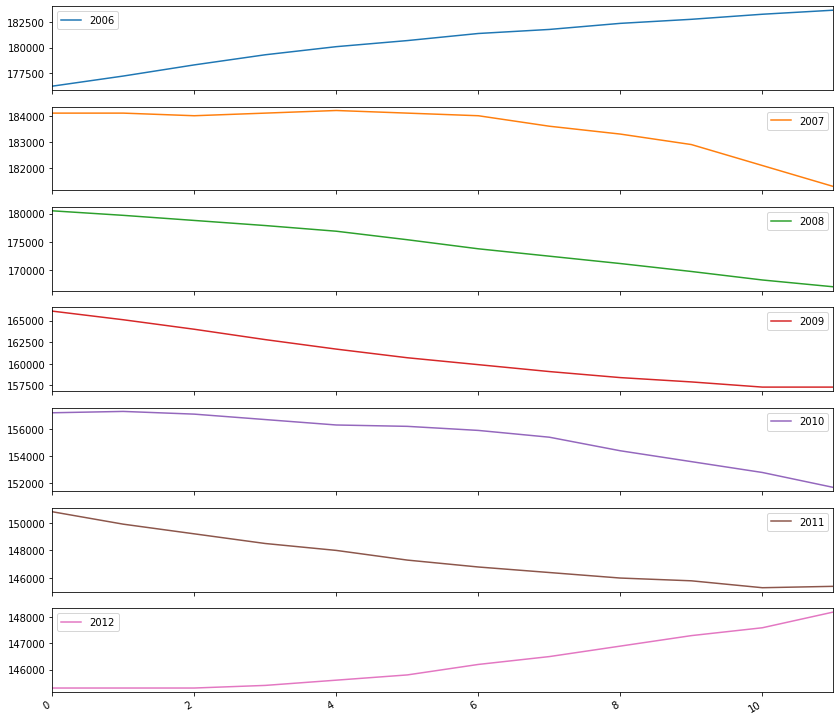

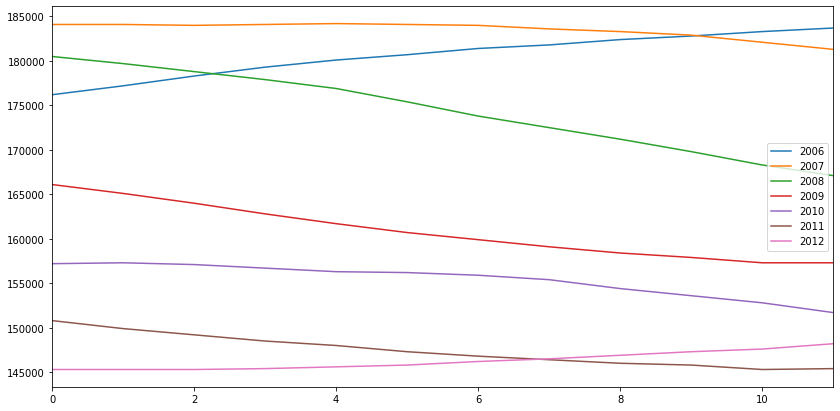

In [9]:
# Use pandas grouper to group values by median using annual frequency
years = dft['2006':'2012'].median(axis=1).groupby(pd.Grouper(freq ='A'))

yr_plot = pd.DataFrame()  #new dataframe to store grouped values in columns to plot

for yr, group in years:
    yr_plot[yr.year] = group.values.ravel()

# Plot each year individually
yr_plot.plot(figsize = (14,14), subplots=True, legend=True);
# Plot all years on single plot
yr_plot.plot(figsize = (14,7), subplots=False, legend=True);

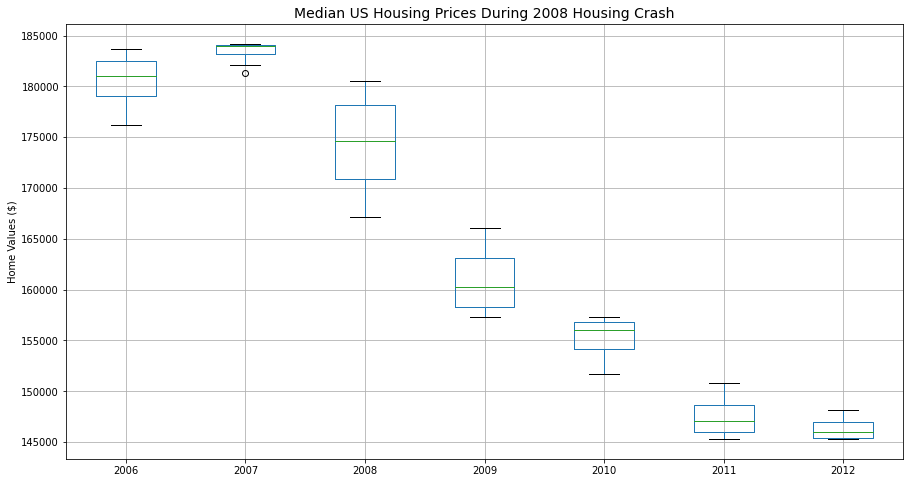

In [10]:
# Generate a box and whiskers plot
yr_plot.boxplot(figsize = (15,8));
plt.title('Median US Housing Prices During 2008 Housing Crash', fontsize=14)
plt.ylabel('Home Values ($)')
plt.show;

### We can clearly see the market peak forming near the end of 2006, falling off a cliff in 2007, hunting for a bottom in late 2009 to early 2010, correcting some more and establishing a floor in late 2011 with recovery beginning in the spring of 2012.

We'll go ahead and create 3 more filter metrics:
* `Drop` - negative ROI of the drop in value from peak to valley during the 2008 crash. We'll use a slightly wider year range from 2005 to 2013 to find the min/max.
* `Recovery` - ROI from crash valley to the end of our 2018 timeframe .
* `Months` - Number of months it takes to retrace back to 'break even' from the crash valley to peak again.

In [11]:
# Calculating loss % from highest to lowest monthly values during 2005-2013
dft_roi['Drop'] = 0
for zip in dft.columns:
    dft_roi.loc[zip,'Drop'] = (dft[zip]['2005':'2013'].max() - 
                                dft[zip]['2005':'2013'].min()) / dft[zip]['2005':'2013'].max()
# Calculating ROI from crash low to 2018 high
dft_roi['Recovery'] = 0
for zip in dft.columns:
    dft_roi.loc[zip,'Recovery'] = (dft_annual[zip]['2018':].max() - 
                                    dft_annual[zip]['2006':'2013'].min()) / dft_annual[zip]['2006':'2013'].min()
# Calculate # of months from crash low to peak again
dft_roi['Months'] = 0
for zip in dft.columns:
    months = 0  # counter
    low = dft[zip]['2006':'2013'].idxmin()  #get month (date index) of valley
    high = dft[zip]['2006':'2013'].max()  #get value of peak
    for m in dft[low:].index:  #iterate thru every month after valley and break once peak is crossed
        if dft.loc[m, zip] >= high: break
        else: months+=1
    dft_roi.loc[zip,'Months'] = months

dft_roi.Drop = dft_roi.Drop.astype('float64')
dft_roi.Recovery = dft_roi.Recovery.astype('float64')
dft_roi.Months = dft_roi.Months.astype('int64')
display(dft_roi.head(3), dft_roi.describe())

,Min_Max_ROI,1996_to_2018,Drop,Recovery,Months
"60657 Chicago, IL",2.042970,2.042970,0.201205,0.406245,52
"75070 McKinney, TX",0.697436,0.386003,0.135851,0.596830,27
"77494 Katy, TX",0.635847,0.573879,0.171263,0.401740,92


,Min_Max_ROI,1996_to_2018,Drop,Recovery,Months
count,14723.000000,14723.000000,14723.000000,14723.000000,14723.000000
mean,1.387741,1.211672,0.276593,0.409551,60.552469
std,0.853103,0.858711,0.137918,0.297358,21.145218
min,0.062251,-0.641192,0.000000,-0.381078,0.000000
25%,0.806905,0.681247,0.175846,0.201349,48.000000
50%,1.219434,1.060237,0.251664,0.330827,64.000000
75%,1.736302,1.526706,0.349067,0.544575,75.000000
max,10.785706,10.785706,0.786567,2.376826,128.000000


#### Let's calculate the 95 percentile thresholds for each metric and experiment with how many zip codes are filtered when combining them.

In [12]:
print(f'Min_Max: {dft_roi.Min_Max_ROI.quantile(q=0.95)}')
print(f"1996_to_2018: {dft_roi['1996_to_2018'].quantile(q=0.95)}")
print(f'Months: {dft_roi.Months.quantile(q=0.05)}')
print(f'Drop: {dft_roi.Drop.quantile(q=0.05)}')
print(f'Recovery: {dft_roi.Recovery.quantile(q=0.95)}')

Min_Max: 2.9433556760151385
1996_to_2018: 2.781253264698858
Months: 22.0
Drop: 0.09983007010943913
Recovery: 1.0031216484729653


In [13]:
dft_roi[dft_roi.Min_Max_ROI>=2.94]

,Min_Max_ROI,1996_to_2018,Drop,Recovery,Months
"94109 San Francisco, CA",3.797144,3.797144,0.296782,0.634355,26
"11226 New York, NY",4.624783,4.624783,0.385574,0.853895,38
"11375 New York, NY",3.326193,3.326193,0.186050,0.650053,55
"11235 New York, NY",3.213712,3.213712,0.190430,0.597442,67
"90250 Hawthorne, CA",2.992132,2.992132,0.382379,0.736774,59
...,...,...,...,...,...
"56314 Bowlus, MN",3.303148,3.303148,0.311749,0.539273,69
"94970 Stinson Beach, CA",5.081414,5.081414,0.423261,1.116859,45
"56578 Rochert, MN",3.210632,3.210632,0.189236,0.603978,21
"80456 Jefferson, CO",5.204262,5.204262,0.153425,0.570408,34


In [14]:
dft_roi[dft_roi.Min_Max_ROI>=2.94][dft_roi['1996_to_2018']>=2.78].shape

C:\Users\Johnny\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(639, 5)

In [15]:
dft_roi[dft_roi.Min_Max_ROI>=2.94][dft_roi['1996_to_2018']>=2.78][dft_roi.Months<=22].shape

C:\Users\Johnny\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(25, 5)

In [16]:
dft_roi[dft_roi.Min_Max_ROI>=2.94][dft_roi['1996_to_2018']>=2.78][dft_roi.Months<=22][dft_roi.Drop<=0.1].shape

C:\Users\Johnny\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(0, 5)

#### Looks like Drop's filter is too restrictive.

In [17]:
dft_roi[dft_roi.Min_Max_ROI>=2.94][dft_roi['1996_to_2018']>=2.78][dft_roi.Months<=22][dft_roi.Recovery>=1.003].shape

C:\Users\Johnny\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(10, 5)

### This looks like a good top 10 to work with! Now let's save our dataframes using pickle. Please open the next Jupyter notebook - 'Models.ipynb'.

In [18]:
#saving our dataframes using pickle
import pickle
with open('dft.pickle', 'wb') as f:
    pickle.dump(dft, f, pickle.HIGHEST_PROTOCOL)
with open('dft_roi.pickle', 'wb') as f:
    pickle.dump(dft_roi, f, pickle.HIGHEST_PROTOCOL)